# Heat Conduction Equition with a source term

## BACKGROUND STORY

Have you ever heard of the story of the rabbits in Australia? At first, there are no rabbits in Australia, one man named Thomas Austin released 24  rabbits in 1859 near Winchelsea, Victoria, for a hunting purpose, but soon the rabbits were out of control.

In 1896, rabbits were found in Queensland, which is more than 1000km away from where they were freed, and a research shows that the total number might be over 100 million

In the beginning of the 20th century, they spread to all over Australia. In 1926, another research shows that there might be over 10 billion rabbits in Australia!

## MATHMATICAL MODEL

This topic greatly suits a model of using the diffusion equation with a source term, which is: 


\begin{equation}
\frac{\partial p}{\partial t} = \alpha \left(\frac{\partial^2 p}{\partial x^2} + \frac{\partial^2 p}{\partial y^2} \right) + Q(p)
\end{equation}


Where p is the population, and the source term Q is a function of the population, probably is 


\begin{equation}
Q(p) = r p
\end{equation}


where r stands for the growth rate of the population. Usually r is also a function of p, which means that the growth rate varies with different amount of population, if the population is low, r could be high, and if the population is high enough, r could be very small. But let's consider r to be a constant for now.



What about $\alpha$ ?Well, I'm very sorry to say that I tried to find some physical meaning for this constant, but failed, so let's just keep it there and use some information to find a reasonable number instead!!!!!!

By using what we have learned in the 4th chapter, we can tell the numerical equation is:

\begin{equation}
p^{n+1}_{i,j}= p^n_{i,j} + \alpha \left( \frac{\Delta t}{\Delta x^2} (p^n_{i+1, j} - 2p^n_{i,j} + p^n_{i-1,j}) + \\\frac{\Delta t}{\Delta y^2} (p^n_{i, j+1} - 2p^n_{i,j} + p^n_{i,j-1})\right) +Q(p){\Delta t}
\end{equation}

If we regard dx and dy are the same, which is:\begin{equation}{\Delta x} = {\Delta y}\end{equation}
We can have:
\begin{equation}
p^{n+1}_{i,j}= p^n_{i,j} + \alpha \frac{\Delta t}{\Delta x^2}\left(  p^n_{i+1, j} - 4p^n_{i,j} + p^n_{i-1,j} + \\\ p^n_{i, j+1} + p^n_{i,j-1}\right) +Q(p){\Delta t}
\end{equation}

## START SOLVING!

Now is the time to set our problems, By googling "Australia", we can find that Australia is about 4000km long in the east-west direction and 3700km in the north-south direction, so we can have our dx = 100km to make a 37 * 40 matrix representing our "Australia"!

And we can use "1 month" as dt, and measure everything in months.

In [1]:
dx = 100
dt = 1

Now let's list the information that we are going to use.

1, In 1859, Thomas Austin released 24 rabbits near Winchelsea, Victoria.

2, In around 1896, rabbits reached Queensland, and the total number may beyond 100 million

3, In 1907, they were spread to all over Australia.

4, In 1926, the number reached 10 billion.

In [2]:
import numpy
from matplotlib import pyplot,cm
%matplotlib inline
from IPython.display import Image

### 1859 to 1896

Now, let's start from 1859 and try to calculate the growth rate to match the total population in 1896! In 1896,people first observed rabbits in Queensland, but how do we define "observed"? Why don't we make an asumption that when there is 100 rabbits in a 100km * 100km square, they are observable. And the total number of rabbits were probably around 100 million, we can use this information to adjust the value of $\alpha$ to make the total number of rabbits around 100 million.

By looking at the map (I removed it because it's too space costing), we can assume that Thomas Austin released the first 24 rabbits in p[0,30] eg.the yellow star near Melbourne, and Queensland is about 14 squares away, which is [14,30],the red area

In [4]:
#initial condition
p_initial = numpy.zeros((37,40))
p_initial[0,30] = 24

Before coding, there is one problem: how can we make sure that after 37 years, the number of p[14,30] is just reached 100?

Certainly we don't want to do the calculation by hand, We can do it by using a while loop outside the loop of step calculations, if the result don't match what we want, we can simply change a little bit and let the code run again! Until we got the answer we want.

In [5]:
def year_1859_to_1896(p_initial,dx,dt):
    """ 
    calculate the distribution of the density ofrabbits populations from 1859 to 1896, 
    with alpha = 89.5 to adjust the population to be around 100 million
    
    
    Parameters:
    ----------
    p_initial: initial condition
    dx: in this project, dx = 100 is suggested,stands for 100 km
    dt: in this project, dt = 1 is suggested, stands for 1 month
    
    Returns:
    -------
    p: a 37 * 40 matrix, the population of the rabbits distribution in 1896
    growth_rate: the growth rate that make sure after 444 months eg. from 1859 to 1896, the rabbits can reach the Queensland.
    """
    months = 0
    growth_rate = 0.005
    p_n = numpy.zeros_like(p_initial)
    p = p_initial.copy()
    
    
    while months != 444:                   #444 = 12 months/year * 37 years， and if the result does't match 444 months, 
                                            #                                  cauculate again until it's 444!
        months = 0
        p = p_initial.copy()
        
        
        
        while p[14,30]<100:             # when the local population reaches 100, we consider they can be observed!
            p_n = p.copy()
            p[1:-1,1:-1] = (1 + growth_rate*dt)*p_n[1:-1,1:-1] + 89.5*dt/dx**2 * (p_n[1:-1,:-2] + p_n[1:-1,2:] + p_n[:-2,1:-1] + p_n[2:,1:-1] - \
                                                                                      4*p_n[1:-1,1:-1])
            
                                            #here we take alpha  = 89.5 
                                            #in order to make sure that the total population is around 100 million according to the information we have
                
            p[0,:] = p[1,:]                 #Boundary Conditions, since the rabbits cannot fly, which makes no "rabbit flow" on the boundary. 
            p[-1,:] = p[-2,:]               #So we use Neumann boundary conditions to the four boundaries!!
            p[:,0] = p[:,1]
            p[:,-1] = p[:,-2]
            
            
            months = months + 1
            
        if months > 444:                  #check out if the total time steps matches 444, 
            growth_rate = growth_rate*1.5 #if it's larger than 444, means that the growth rate is too low, so we redo the calculation with 1.5 times the growth rate, 
        elif months < 444:               #or if months were smaller than 444, which means they grow too fast, so we half the growth rate!
            growth_rate = growth_rate*0.5
            
            
    return p, growth_rate      

CHECK THE RESULT!!

In [6]:
p_1896, growth_rate_1896 = year_1859_to_1896(p_initial,dx,dt)

In [7]:
print("The average growth rate between 1859 and 1896 is",growth_rate_1896)

The average growth rate between 1859 and 1896 is 0.04547229100934768


The result shows the growth rate is 4.55% per month!! This is a super huge number for the growth rate, no wonder why the rabbits can beat us human in Australia!

let's plot the result!

In [10]:
def plot_result(Z):
    x = numpy.linspace(0, 4000, 40)
    y = numpy.linspace(0, 3700, 37)
    X, Y = numpy.meshgrid(x,y)
    pyplot.contourf(X,Y,Z,20,cmap=cm.viridis)
    pyplot.colorbar();

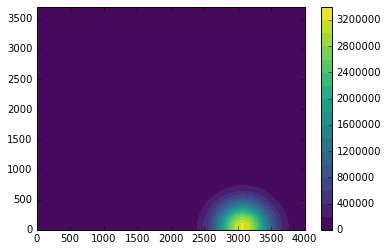

In [11]:
plot_result(p_1896)

Well, we can see that the population of the rabbits are spreading, although they seems not very fast, but the population density is enormous at the bottom-right area!!!

## 1896 to 1926

For the next step, let's cauculate the polulation distribution and the average growth rate from 1896 to 1926, the code is more or less the same, we only need to change several lines of it, you may ask, can we  write only one function so that it is able to solve the two similar problems? Well, I think the answer is yes, and I tried, and I need more time to working on it.

In [12]:
def year_1896_to_1926(p_initial, dx, dt):
    
    """ 
    calculate the distribution of the density ofrabbits populations from 1896 to 1926, 
    with alpha = 895 to make the model more suitable to the real problem
    
    
    Parameters:
    ----------
    p_initial: initial condition, which is the result of the first function
    dx: in this project, dx = 100 is suggested,stands for 100 km
    dt: in this project, dt = 1 is suggested, stands for 1 month
    
    Returns:
    -------
    p: A 37 * 40 matrix, the population of the rabbits distribution in 1926
    growth_rate: the growth rate that make sure after 360 months eg. from 1896 to 1926, the rabbits population reaches 10 billion
    """    
    
    months = 0
    growth_rate = 0.005
    p_n = numpy.zeros_like(p_initial)
    p = p_initial.copy()
    
    
    while months != 360:                   #360 = 12 months/year * 30 years， 
                                            #                                  
        months = 0
        p = p_initial.copy()
        
        
        
        while numpy.sum(p)<10000000000:             # when the total number reaches 10 billion, we are good to stop the loop
            p_n = p.copy()
            p[1:-1,1:-1] = (1 + growth_rate*dt)*p_n[1:-1,1:-1] + 895*dt/dx**2 * (p_n[1:-1,:-2] + p_n[1:-1,2:] + p_n[:-2,1:-1] + p_n[2:,1:-1] - \
                                                                                      4*p_n[1:-1,1:-1])
            
                                            #here we take alpha  = 895, 10 times larger than before, why? I'll try to explain later 
                                            #
                
            p[0,:] = p[1,:]                 #Boundary Conditions, since the rabbits cannot fly, which makes no "rabbit flow" on the boundary. 
            p[-1,:] = p[-2,:]               #So we use Neumann boundary conditions to the four boundaries!!
            p[:,0] = p[:,1]
            p[:,-1] = p[:,-2]
            
            months = months + 1
            
        if months > 360:                  #check out if the total time steps matches 360, 
            growth_rate = growth_rate*1.5 #if it's larger than 360, means that the growth rate is too low, so we redo the calculation with 1.5 times the growth rate, 
        elif months < 360:                #or if months were smaller than 360, which means they grow too fast, so we half the growth rate!
            growth_rate = growth_rate*0.5
            
            
    return p, growth_rate      

In [13]:
p_1926, growth_rate_1926 = year_1896_to_1926(p_1896,100,1)

In [14]:
print("The average growth rate between 1896 and 1926 is",growth_rate_1926)

The average growth rate between 1896 and 1926 is 0.013208920500215809


The monthly growth rate of rabbits were , it is much slower than the previous one, lokks like the rabbits are reaching some limits to prevent their further growth.

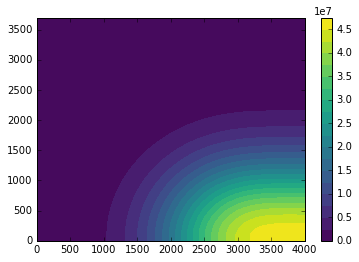

In [15]:
plot_result(p_1926)

## FURTHER MODEL ANALYSE

We've finished the coding, and get the result of the growth rate of the rabbits in Australia during 1859 to 1896 and 1896 to 1926, and plot the result of the population distribution by a simple model of heat equition. So, how good is this model? and How can we improve it?

Well I have to say that this model is very, very inaccurate. It's just not possible to model the growth and the spread of the population by a simple heat equition. There are many other things that can influence the growth rate and the spread speed of rabbits, including food, weather, other animals activity and human's hunting, also the geography can influence the spreadding speed, eg. a mountain or a river can significantly block the spread speed.

But there are some other things that may can be done by more detailed coding. For example, in my project, we regard growth rate as an constant. If we consider it more carefully, it won't be hard to come up with a function of growth rate that is inverse proportional to the local population density. 

Another thing that need more attention is the constant  $\alpha$, in the heat equition, $\alpha$ is a constant that is proportional to the constant in the Fourier's law, which means that this constant can influence the heat flux related to the gradient of the temperature. However, in  this project, I didn't find a meaningful explaination for $\alpha$, but if we look at the equition carefully, 

\begin{equation}
p^{n+1}_{i,j}= p^n_{i,j} + \alpha \frac{\Delta t}{\Delta x^2}\left(  p^n_{i+1, j} - 4p^n_{i,j} + p^n_{i-1,j} + \\\ p^n_{i, j+1} + p^n_{i,j-1}\right) +Q(p){\Delta t}
\end{equation}

Or if we write this equition in another way: 

\begin{equation}
p^{n+1}_{i,j} - p^n_{i,j}= \alpha \frac{\Delta t}{\Delta x^2}\left(  p^n_{i+1, j} - 4p^n_{i,j} + p^n_{i-1,j} + \\\ p^n_{i, j+1} + p^n_{i,j-1}\right) +Q(p){\Delta t}
\end{equation}

Then it is clear that the change amount of the population is from two parts, one is from other areas around p[j,i], another part is the source term. So, larger $\alpha$ means that the influence of the "spread" progress influence the change of the population greater. In other words, $\alpha $ can be a function of the growth rate! If the growth rate is high, that can lead to a lower  $\alpha$, or if the growth rate is very low, $\alpha$ tends to be higher! And that is the reason why I choose 89.5 in the first function and 895 in the second function. and the model is going to be a nonlinear equition instead!

## AFTER THE END

I have to say that I wish to try more things that I learned in the course into this project, including using the implicit method instead of the explicit method, and maybe think more about how to model the function for the growth rate instead of only a constant, also on how to functioning the $\alpha$, but I'm running out of time and papers, so I think that is the end of the project!